# Module 3 - File I/O and NumPy

## Topic 1 - Web Scraping, File I/O

### There's a great deal of valuable data being created every second on the web. If we can gather this data and store it in a clean, structured way, it can be used in our programs¶

### Web Scraping Example

In [1]:
from requests import get
from contextlib import closing
from bs4 import BeautifulSoup

In [2]:
def get_a_page(url):
    header = {'User-agent' : 'Mozilla/5.0 (Windows; U; Windows NT 5.1; de; rv:1.9.1.5) Gecko/20091102 Firefox/3.5.5'}
    with closing(get(url, headers=header)) as resp:
        return resp

In [3]:
raw_html = get_a_page("https://desmoines.craigslist.org/d/recreational-vehicles/search/rva")

In [4]:
html = BeautifulSoup(raw_html.text, 'html.parser')
postings = html.find_all('li', class_= 'result-row')
print(type(postings))
print(len(postings))

<class 'bs4.element.ResultSet'>
120


In [5]:
print (postings[0])

<li class="result-row" data-pid="7194302955" data-repost-of="7192502030">
<a class="result-image gallery" data-ids="3:00V0V_alm2M2tBhPp_09v06X,3:01313_h0l91pIOv9f_0bX0bb,3:00v0v_fwdnNDLXdZ5_0eK0b2,3:00W0W_hbXZ500OOed_0eR0b1,3:00J0J_ctkMKb2XyYO_0eZ0aV" href="https://desmoines.craigslist.org/rvs/d/des-moines-2003-coleman-niagara-elite/7194302955.html">
<span class="result-price">$800</span>
</a>
<p class="result-info">
<span class="icon icon-star" role="button">
<span class="screen-reader-text">favorite this post</span>
</span>
<time class="result-date" datetime="2020-09-11 11:38" title="Fri 11 Sep 11:38:30 AM">Sep 11</time>
<a class="result-title hdrlnk" data-id="7194302955" href="https://desmoines.craigslist.org/rvs/d/des-moines-2003-coleman-niagara-elite/7194302955.html">2003 Coleman Niagara Elite popup tent trailer</a>
<span class="result-meta">
<span class="result-price">$800</span>
<span class="result-hood"> (Des Moines)</span>
<span class="result-tags">
<span class="pictag">pic</s

### Get data for a single posting to ensure this works

In [7]:
# Get price for first listing
post_1_price = postings[0].a.text
post_1_price = post_1_price.strip()
print(post_1_price)
# Get timestamp for first listing
post_1_time = postings[0].find('time', class_= 'result-date')
post_1_datetime = post_1_time['datetime']
print(post_1_datetime)

$800
2020-09-11 11:38


In [8]:
# Get text of title of first listing
post_1_title = postings[0].find('a', class_= 'result-title hdrlnk')
post_1_link = post_1_title['href']
print( post_1_link,post_1_title.text)

https://desmoines.craigslist.org/rvs/d/des-moines-2003-coleman-niagara-elite/7194302955.html 2003 Coleman Niagara Elite popup tent trailer


In [9]:
post_1_location = postings[0].find(class_= 'result-hood')
print(post_1_location.text)

 (Des Moines)


### Now gather data for all listings

In [10]:
from time import sleep
import re # regex library
from random import randint #avoid throttling by not sending too many requests one after the other
from warnings import warn
from time import time
from IPython.core.display import clear_output
import numpy as np

In [11]:
results_num = html.find('div', class_= 'search-legend')
results_total = int(results_num.find('span', class_='totalcount').text)
print(results_total)

187


In [12]:
pages = np.arange(0, results_total+1, 120)
print(pages)

[  0 120]


In [13]:
iterations = 0

post_timing = []
post_hoods = []
post_title_texts = []
post_prices = []
post_links = []

In [14]:
for page in pages:
    
    #get request
    response = get("https://desmoines.craigslist.org/d/recreational-vehicles/search/rva?" 
                   + "s=" #the parameter for defining the page number 
                   + str(page) #the page number in the pages array from earlier
                   )

    sleep(randint(1,5))
     
    #throw warning for status codes that are not 200
    if response.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, response.status_code))
        
    #define the html text
    page_html = BeautifulSoup(response.text, 'html.parser')
    
    #define the posts
    posts = page_html.find_all('li', class_= 'result-row')
        
    #extract data item-wise
    for post in posts:

        if post.find('span', class_ = 'result-hood') is not None:

            #posting date
            #grab the datetime element 0 for date and 1 for time
            post_datetime = post.find('time', class_= 'result-date')['datetime']
            post_timing.append(post_datetime)

            #neighborhoods
            post_hood = post.find('span', class_= 'result-hood').text
            post_hoods.append(post_hood)

            #title text
            post_title = post.find('a', class_='result-title hdrlnk')
            post_title_text = post_title.text
            post_title_texts.append(post_title_text)

            #post link
            post_link = post_title['href']
            post_links.append(post_link)
            
            #removes the \n whitespace from each side, removes the currency symbol, and turns it into an int
            if post.a.text == "":
                post_price = 0
            else:
                post_price = int((post.a.text.strip().replace("$", "")).replace(",", "")) 
            post_prices.append(post_price)
            
    iterations += 1
    print("Page " + str(iterations) + " scraped successfully!")

print("\n")

print("Scrape complete!")

Page 1 scraped successfully!
Page 2 scraped successfully!


Scrape complete!


In [16]:
# I can now load all my lists into a dictionary of lists (or whatever data structure makes the most sense)
all_listing_dict = {}
for listing in range (0,len(post_title_texts)):
    all_listing_dict[listing]=[post_timing[listing],post_hoods[listing],post_title_texts[listing],post_prices[listing],post_links[listing]]

#print(all_listing_dict)
print(all_listing_dict[0])
#print(all_listing_dict[1])

['2020-09-11 11:38', ' (Des Moines)', '2003 Coleman Niagara Elite popup tent trailer', 800, 'https://desmoines.craigslist.org/rvs/d/des-moines-2003-coleman-niagara-elite/7194302955.html']


In [17]:
for item in all_listing_dict:
    print(all_listing_dict[item][3])

800
200
28000
0
23900
6500
51800
178000
14900
10500
110
5700
150
59900
12995
0
64500
0
14999
130
17500
12000
82500
12999
100
9200
4500
189999
160
11500
60000
14995
14995
31900
42000
84999
63000
15999
15900
7500
6700
28900
17500
16500
0
1571
119999
7000
7300
113700
7999
14300
13500
0
21500
6995
19999
6500
8500
28499
16999
10900
26000
15500
32000
36500
40000
169000
79988
48999
28499
11500
11500
700
7250
195000
0
110000
16999
48999
17500
28499
16999
19500
40000
10500
0
14500
14900
9500
48999
28499
39490
79399
0
29799
16999
48999
48500
13500
0
28499
48999
14000
37350
28999
99999
96999
25500
16999
28499
59500
16500
37000
48999
28499
11200
13500
16999
28499
15690
48999
16999
20000
18900
6700
0
12999
6500
13900
28499
48999
14995
14500
6995
6995
27500
0
36350
37350
17900
28499
48999
13950
28499
5899
21995
6599
48999
6595
37500
5899
28499
0
6599
48999
13500
22500
20000
3000
43855
36900
14999
0
5450
3400
54000
17000
19900
5899
28499
43900
6599
48999
88000


### Topic 1 Continuted: File Input Example

In [18]:
# This example assumes you have the Moby_Dick_Chapter_1.txt file in the same directory as your program
with open('Moby_Dick_Chapter_1.txt','r') as input_file:
    for line in input_file:
        print(line)


CHAPTER 1. Loomings.



Call me Ishmael. Some years ago—never mind how long precisely—having

little or no money in my purse, and nothing particular to interest me

on shore, I thought I would sail about a little and see the watery part

of the world. It is a way I have of driving off the spleen and

regulating the circulation. Whenever I find myself growing grim about

the mouth; whenever it is a damp, drizzly November in my soul; whenever

I find myself involuntarily pausing before coffin warehouses, and

bringing up the rear of every funeral I meet; and especially whenever

my hypos get such an upper hand of me, that it requires a strong moral

principle to prevent me from deliberately stepping into the street, and

methodically knocking people’s hats off—then, I account it high time to

get to sea as soon as I can. This is my substitute for pistol and ball.

With a philosophical flourish Cato throws himself upon his sword; I

quietly take to the ship. There is nothing surprising in

In [19]:
# This example assumes you have the Moby_Dick_Chapter_1.txt file in the same directory as your program
import re
moby_dick_word_count = {}

with open('Moby_Dick_Chapter_1.txt','r') as input_file:
    for line in input_file:
        # First lowercase all characters in the line
        line = line.lower()
        # Next clean the line of any punctuation
        line_clean =  re.sub(r'[^\w\s]', '', line)
        # Now split the line into words
        line_split = line_clean.split()
        # Now we can add the words to our dictionary
        for word in line_split:
            if word in moby_dick_word_count.keys():
                moby_dick_word_count[word] += 1
            else:
                moby_dick_word_count[word] = 1
print(moby_dick_word_count)

{'chapter': 1, '1': 1, 'loomings': 1, 'call': 1, 'me': 24, 'ishmael': 2, 'some': 11, 'years': 1, 'agonever': 1, 'mind': 1, 'how': 3, 'long': 2, 'preciselyhaving': 1, 'little': 4, 'or': 10, 'no': 5, 'money': 4, 'in': 48, 'my': 14, 'purse': 3, 'and': 73, 'nothing': 3, 'particular': 2, 'to': 53, 'interest': 1, 'on': 12, 'shore': 1, 'i': 43, 'thought': 1, 'would': 3, 'sail': 2, 'about': 6, 'a': 68, 'see': 5, 'the': 124, 'watery': 1, 'part': 7, 'of': 81, 'world': 3, 'it': 32, 'is': 34, 'way': 4, 'have': 8, 'driving': 1, 'off': 2, 'spleen': 1, 'regulating': 1, 'circulation': 1, 'whenever': 5, 'find': 2, 'myself': 3, 'growing': 1, 'grim': 1, 'mouth': 1, 'damp': 1, 'drizzly': 1, 'november': 1, 'soul': 3, 'involuntarily': 1, 'pausing': 1, 'before': 3, 'coffin': 1, 'warehouses': 2, 'bringing': 1, 'up': 4, 'rear': 1, 'every': 4, 'funeral': 1, 'meet': 1, 'especially': 1, 'hypos': 1, 'get': 6, 'such': 5, 'an': 4, 'upper': 1, 'hand': 3, 'that': 31, 'requires': 2, 'strong': 2, 'moral': 1, 'principle'

In [20]:
sorted(moby_dick_word_count.items(), key=lambda x: x[1], reverse=True)

[('the', 124),
 ('of', 81),
 ('and', 73),
 ('a', 68),
 ('to', 53),
 ('in', 48),
 ('i', 43),
 ('is', 34),
 ('it', 32),
 ('that', 31),
 ('as', 26),
 ('me', 24),
 ('all', 23),
 ('you', 23),
 ('this', 17),
 ('for', 16),
 ('there', 15),
 ('but', 15),
 ('my', 14),
 ('with', 13),
 ('on', 12),
 ('they', 12),
 ('go', 12),
 ('some', 11),
 ('from', 11),
 ('not', 11),
 ('or', 10),
 ('sea', 10),
 ('his', 10),
 ('one', 10),
 ('into', 9),
 ('upon', 9),
 ('if', 9),
 ('be', 9),
 ('he', 9),
 ('have', 8),
 ('by', 8),
 ('was', 8),
 ('part', 7),
 ('were', 7),
 ('what', 7),
 ('do', 7),
 ('why', 7),
 ('about', 6),
 ('get', 6),
 ('time', 6),
 ('can', 6),
 ('take', 6),
 ('your', 6),
 ('land', 6),
 ('like', 6),
 ('more', 6),
 ('water', 6),
 ('will', 6),
 ('down', 6),
 ('voyage', 6),
 ('old', 6),
 ('no', 5),
 ('see', 5),
 ('whenever', 5),
 ('such', 5),
 ('other', 5),
 ('same', 5),
 ('now', 5),
 ('at', 5),
 ('are', 5),
 ('here', 5),
 ('most', 5),
 ('ever', 5),
 ('when', 5),
 ('did', 5),
 ('who', 5),
 ('sailor', 5

In [21]:
data_for_output = sorted(moby_dick_word_count.items(), key=lambda x: x[1], reverse=True)

with open("moby_dick_word_counts.txt",'w') as fileoutput:
    for item in data_for_output:
        #print(item)
        fileoutput.write(item[0] + " " + str(item[1])+ "\n")

## Topic 2 - Intro to SciPy Package

### This topic contains some links to information about the power of the SciPy library

## Topic 3 - NumPy Arrays

### Arrays, the not NumPy type first

In [22]:
import array
my_array = array.array('i',[5,4,3,2])
print(my_array)

array('i', [5, 4, 3, 2])


In [23]:
my_array[0]

5

In [24]:
print(my_array[0:2])
my_array[1] = 5
my_array.append(9)
print(my_array)
my_array.remove(9)
print(my_array)

array('i', [5, 4])
array('i', [5, 5, 3, 2, 9])
array('i', [5, 5, 3, 2])


In [25]:
my_array.pop()

2

### NumPy

In [27]:
import numpy as np
my_narray = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12],[13,14,15,16]])
print(my_narray)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


### Common NumPy Properties

In [41]:
# Output the shape of the array
print(my_narray.shape)
# Output the number of items in the array
print(my_narray.size)
# Output the datatype of the array items
print(my_narray.dtype)

(4, 4)
16
int32


### Accessing data in a NumPy Array

In [42]:
# Returns the maximum value in the entire array
print(my_narray.max())
# Sums the entire array
print(my_narray.sum())

16
136


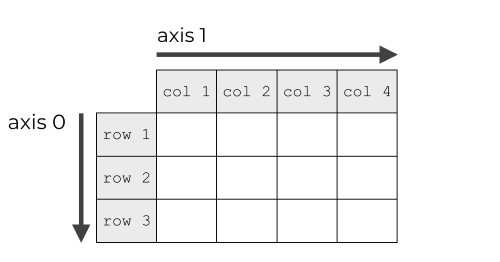

In [29]:
print(my_narray)
print("")
# Returns the maximum value on axis 0
print(my_narray.max(axis=0))
# Sums (collapses) the array along axis 1
print("")
print(my_narray.sum(axis=1))

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

[13 14 15 16]

[10 26 42 58]


In [30]:
print(my_narray)
print("")
my_array_divide_by_3 = my_narray%3==0
print(my_array_divide_by_3)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

[[False False  True False]
 [False  True False False]
 [ True False False  True]
 [False False  True False]]


In [31]:
print(my_narray)
print("")
my_narray_slice = my_narray[1:3,1:3]
print(my_narray_slice)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

[[ 6  7]
 [10 11]]


In [32]:
array_1 = np.array([[1,2],[3,4]])
array_2 = np.array([[3,4],[5,6]])

In [19]:
array_sum = np.add(array_1,array_2)
print(array_sum)

[[ 4  6]
 [ 8 10]]


In [18]:
array_sum = np.multiply(array_1,array_2)
print(array_sum)

[[ 3  8]
 [15 24]]


## Topic 4 - Manipulation of NumPy Arrays

### There are a ton of different ways that NumPy arrays can be manipulated.  Let's have a look at a few of them.

### I'll start by creating a 2x6 array

In [33]:
import numpy as np
another_narray = np.array([[1,2,3,4,5,6],[7,8,9,10,11,12]])
print(another_narray)

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]


### Let's mess with the shape of my array

In [47]:
# Resize an array in place (replaces existing array variable)
another_narray.resize(6,2)
print(another_narray)

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]


In [48]:
# Transpose array axes and overwrite existing array
another_narray = another_narray.transpose()
print(another_narray)

[[ 1  3  5  7  9 11]
 [ 2  4  6  8 10 12]]


In [34]:
# Flatten my array
another_narray = another_narray.flatten()
print(another_narray)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [35]:
# Sort my array
another_narray.sort()
print(another_narray)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [36]:
# Now break it back into a 2x6, giving me exactly what I started with...
another_narray.resize (2,6)
print(another_narray)

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
